In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1. Dependencies

In [29]:
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


In [30]:
pip install openai_cost_logger

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### 2. Imports

In [31]:
import os
import sys
import openai
import pathlib

# Add the src directory to the path
sys.path.insert(0, str(pathlib.Path('src')))

In [32]:
from openai_cost_logger.constants import DEFAULT_LOG_PATH, Models, MODELS_COST
from openai_cost_logger.openai_cost_logger_viz import OpenAICostLoggerViz
from openai_cost_logger.openai_cost_logger_utils import OpenAICostLoggerUtils
from openai_cost_logger.openai_cost_logger import OpenAICostLogger

### 3. Set API key environment variable

In [33]:
# Export the proper environment variables based on the client you are using.

# OpenAI API Key
os.environ["OPENAI_ORGANIZATION"] = OpenAICostLoggerUtils.get_api_key(path='openai_organization.txt')
os.environ["OPENAI_API_KEY"] = OpenAICostLoggerUtils.get_api_key(path='openai_api_key.txt')

# Azure OpenAI API Key
os.environ["AZURE_OPENAI_KEY"] = OpenAICostLoggerUtils.get_api_key('azure_openai_key.txt')

### 4. Input Arguments

In [34]:
experiment_name = "Demo"
messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Who won the euro 2020?"},
]
cost_upperbound = 2
log_folder = DEFAULT_LOG_PATH

In [35]:
# Azure OpenAI usage
model = Models.AZURE_3_5_TURBO
client_args = {
    "azure_endpoint": "https://your_key.openai.azure.com/",
    "api_key": os.getenv("AZURE_OPENAI_KEY"),
    "api_version": "your_api_version",
}
input_cost = MODELS_COST[model.value]["input"]
output_cost = MODELS_COST[model.value]["output"]

In [36]:
# OpenAI usage
client = openai.OpenAI(api_key=os.getenv("OPENAI_API_KEY"))
model = Models.TURBO_3_5
client_args = {}
input_cost = MODELS_COST[model.value]["input"]
output_cost = MODELS_COST[model.value]["output"]

### 5. Demo

**NOTE:**

The logger is independent of the OpenAI api call. Indeed, It only require the endpoint answer as input and the user is fully responsible of the model call. Despite that, in the cells below you can find a full working demo.

In [37]:
# Create the OpenAICostLogger object
cost_logger = OpenAICostLogger(
    experiment_name = experiment_name,
    model = model.value,
    input_cost = input_cost,
    output_cost = output_cost,
    log_folder = log_folder,
    cost_upperbound = cost_upperbound
)

In [38]:
# Run the chat completion endpoint
response = client.chat.completions.create(model=model.value, messages=messages, max_tokens=1, temperature=0)
cost_logger.update_cost(response)

### 6. Data Visualization

In [39]:
# Print the total cost
OpenAICostLoggerViz.print_total_cost(path=DEFAULT_LOG_PATH)

Total cost: 0.000986 (USD)


In [40]:
# Cost by model
OpenAICostLoggerViz.print_total_cost_by_model(path=DEFAULT_LOG_PATH)

gpt-3.5-turbo: 0.000887 (USD)
gpt-35-turbo-0125: 9.9e-05 (USD)


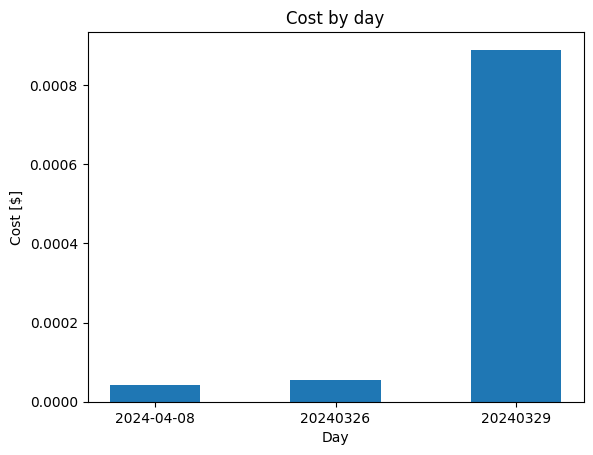

In [41]:
# Visualize the cost by day
OpenAICostLoggerViz.plot_cost_by_day(path=DEFAULT_LOG_PATH)